# Speaker Recognition via Spectrogram Analysis

# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ffmpeg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fastai
from fastai.vision import *
fastai.__version__

'1.0.61'

In [ ]:
import os
DATASET_ROOT = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data'

SPECTROGRAM_SUBFOLDER = 'spectrograms'

SPECTROGRAM_PATH = os.path.join(DATASET_ROOT, SPECTROGRAM_SUBFOLDER)
TRAIN_PATH = os.path.join(SPECTROGRAM_PATH, 'train')
VALID_PATH = os.path.join(SPECTROGRAM_PATH, 'valid')

In [ ]:
data = (ImageList.from_folder(SPECTROGRAM_PATH)
    .split_by_folder()
    .label_from_re(r'(\w+)_\w+.png$')
    .databunch())

In [ ]:
data.c, data.classes

(5, ['Dan', 'Ed', 'Hom', 'Juan', 'Mike'])

In [ ]:
xs, ys = data.one_batch()
xs.shape, ys.shape

(torch.Size([64, 3, 128, 44]), torch.Size([64]))

In [ ]:
xs.min(), xs.max(), xs.mean(), xs.std()

(tensor(0.0039), tensor(0.9922), tensor(0.3581), tensor(0.1930))

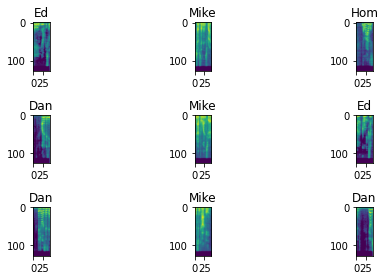

In [ ]:
data.show_batch(3, figsize=(8,4), hide_axis=False)

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.623702,1.589115,0.501176,00:03
1,0.979657,0.647893,0.767059,00:03
2,0.656712,0.522453,0.837647,00:03


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

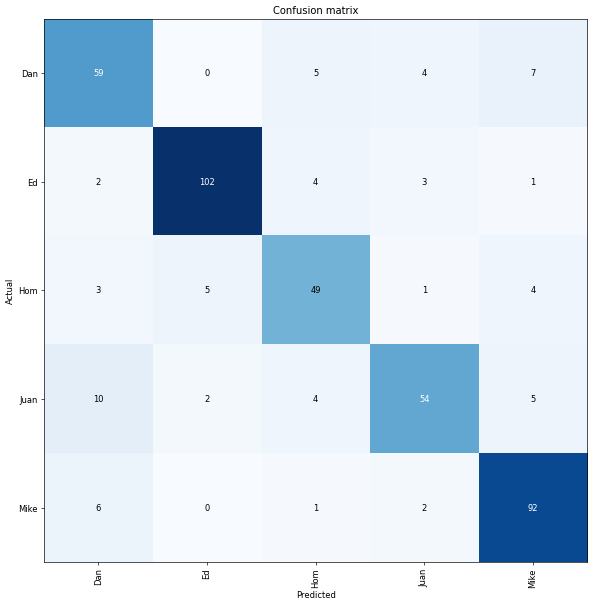

In [ ]:
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [ ]:
interp.most_confused(min_val=1)

[('Juan', 'Dan', 10),
 ('Dan', 'Mike', 7),
 ('Mike', 'Dan', 6),
 ('Dan', 'Hom', 5),
 ('Hom', 'Ed', 5),
 ('Juan', 'Mike', 5),
 ('Dan', 'Juan', 4),
 ('Ed', 'Hom', 4),
 ('Hom', 'Mike', 4),
 ('Juan', 'Hom', 4),
 ('Ed', 'Juan', 3),
 ('Hom', 'Dan', 3),
 ('Ed', 'Dan', 2),
 ('Juan', 'Ed', 2),
 ('Mike', 'Juan', 2),
 ('Ed', 'Mike', 1),
 ('Hom', 'Juan', 1),
 ('Mike', 'Hom', 1)]

In [ ]:
learn.export(file = Path("/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/export.pkl"))